## Data Preprocessing

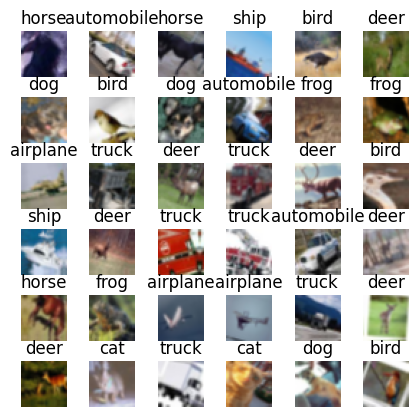

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# One-hot encode the labels
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Create a data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomTranslation(0.1, 0.1),
    tf.keras.layers.RandomFlip("horizontal"),
])


# Convert data to TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

# Apply augmentation to the training dataset
train_dataset = (
    train_dataset
    .shuffle(buffer_size=50000)  # Shuffle the dataset
    .map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=tf.data.AUTOTUNE)
    .batch(128)
    .prefetch(tf.data.AUTOTUNE)
)

# Prepare the test dataset
test_dataset = (
    test_dataset
    .batch(128)
    .prefetch(tf.data.AUTOTUNE)
)

# Visualize some augmented images
augmented_images, augmented_labels = next(iter(train_dataset))

fig, axes = plt.subplots(6, 6, figsize=(5, 5))
axes = axes.ravel()
for i in np.arange(0, 36):
    axes[i].imshow(augmented_images[i].numpy())
    label_index = tf.argmax(augmented_labels[i]).numpy()  # Get the class index
    axes[i].set_title(class_names[label_index])
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)
plt.show()



## Create the Model

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define the model
model = Sequential()

# Convolutional Block 1
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Convolutional Block 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Convolutional Block 3
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Convolutional Block 4
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Flatten and Fully Connected Block
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 656,330 (2.50 MB)

 Trainable params: 654,858 (2.50 MB)

 Non-trainable params: 1,472 (5.75 KB)

## Model Training

In [47]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
history = model.fit(
    train_dataset,  # Use the tf.data.Dataset pipeline for training. This is new to me I hope it works
    epochs=50,
    validation_data= test_dataset,  # Use the test_dataset for validation
    callbacks=[early_stopping]
)


Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 48s 109ms/step - accuracy: 0.2750 - loss: 2.3320 - val_accuracy: 0.1860 - val_loss: 2.5377
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.4349 - loss: 1.5664 - val_accuracy: 0.4381 - val_loss: 1.7754
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 102ms/step - accuracy: 0.4979 - loss: 1.3859 - val_accuracy: 0.5213 - val_loss: 1.4164
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 104ms/step - accuracy: 0.5320 - loss: 1.3011 - val_accuracy: 0.4876 - val_loss: 1.5114
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 104ms/step - accuracy: 0.5549 - loss: 1.2440 - val_accuracy: 0.5901 - val_loss: 1.1926
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 106ms/step - accuracy: 0.5827 - loss: 1.1770 - val_accuracy: 0.5996 - val_loss: 1.1406
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 50s 126ms/step - accuracy: 0.5964 - loss: 1.1383 - val_accuracy: 0.5874 - val_loss: 1.1952
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 51s 131ms/step - accuracy: 0.6061 - loss: 1

## Model Eval

Test Loss: 0.7330184578895569
Test Accuracy: 0.7508000135421753


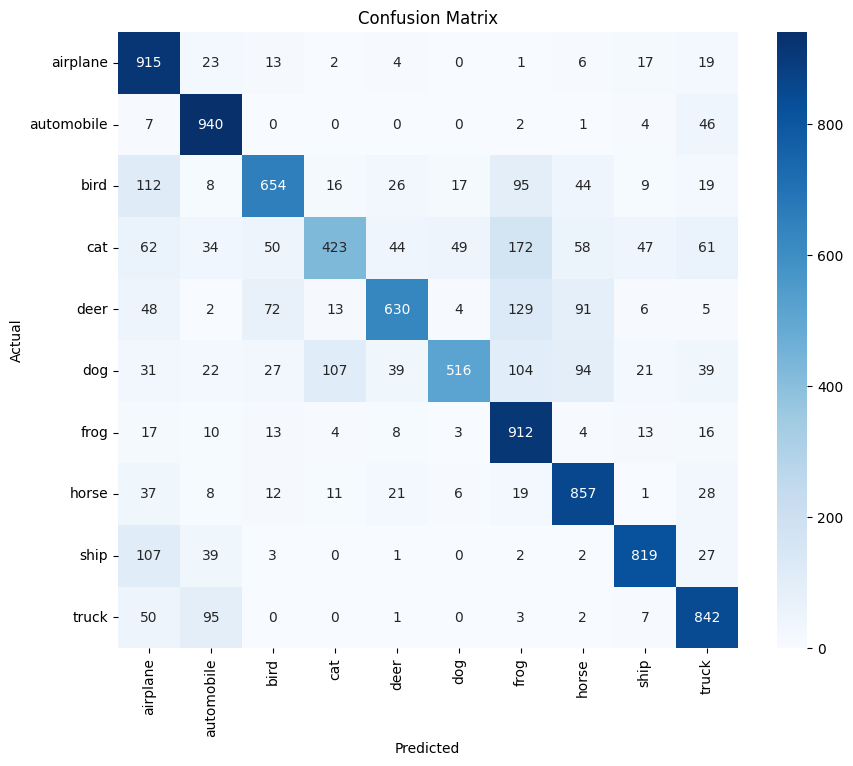

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_dataset, verbose=0)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

# Predict the classes using the test dataset
y_pred = []
y_true = []

# converting dataset, I need to learn more about this
for images, labels in test_dataset:
    predictions = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(predictions, axis=1))  # Convert predictions to class indices
    y_true.extend(np.argmax(labels.numpy(), axis=1))  # Convert one-hot labels to class indices


# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


## Transfer Learning

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 228s 287ms/step - accuracy: 0.3086 - loss: 1.9215 - val_accuracy: 0.4960 - val_loss: 1.4439
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 215s 274ms/step - accuracy: 0.4457 - loss: 1.5668 - val_accuracy: 0.5244 - val_loss: 1.3586
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 220s 281ms/step - accuracy: 0.4673 - loss: 1.5153 - val_accuracy: 0.5306 - val_loss: 1.3201
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 233s 297ms/step - accuracy: 0.4728 - loss: 1.4845 - val_accuracy: 0.5413 - val_loss: 1.3040
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 225s 288ms/step - accuracy: 0.4817 - loss: 1.4688 - val_accuracy: 0.5409 - val_loss: 1.2964
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 213s 273ms/step - accuracy: 0.4875 - loss: 1.4512 - val_accuracy: 0.5508 - val_loss: 1.2767
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 214s 273ms/step - accuracy: 0.4955 - loss: 1.4399 - val_accuracy: 0.5455 - val_loss: 1.2826
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 214s 273ms/step - accuracy: 0.5007 -

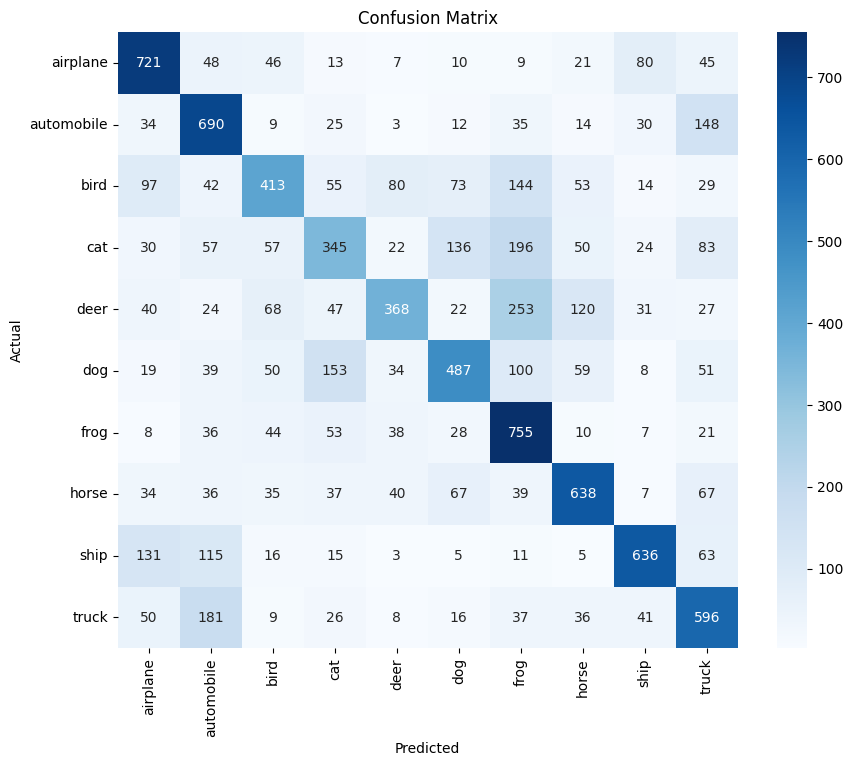

In [29]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the VGG16 model with pre-trained weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the layers of the base model
base_model.trainable = False

# Add custom classification layers
transfer_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Adjust for CIFAR-10's 10 classes
])

# Compile the model
transfer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model (assuming `train_dataset` and `test_dataset` are properly set up)
history = transfer_model.fit(
    train_dataset,
    epochs=20,
    validation_data=test_dataset,
    callbacks=[early_stopping]
)

# Evaluate the model on the test dataset
test_loss, test_acc = transfer_model.evaluate(test_dataset, verbose=0)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

# Predict the classes using the test dataset
y_pred = []
y_true = []

for images, labels in test_dataset:
    predictions = transfer_model.predict(images, verbose=0)
    y_pred.extend(np.argmax(predictions, axis=1))  # Convert predictions to class indices
    y_true.extend(np.argmax(labels.numpy(), axis=1))  # Convert one-hot labels to class indices

# Classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


